<a href="https://colab.research.google.com/github/jg4726/public-file/blob/main/Cnn_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


class Conv2D:
  def __init__(self, k1, b1, stride=1, padding=0):

    self.k1 = k1
    self.b1 = b1
    self.stride = stride
    self.padding = padding

  def feedforward(self, img):
 
    N, k1_height, _ =  self.k1.shape

    C1_height = int((img.shape[0] - k1_height + 2 * self.padding) / self.stride) + 1

    # Initialize C
    C1 = np.zeros((N, C1_height, C1_height), dtype=np.float64)
    dC1S1 = np.zeros(C1.shape, dtype=np.float64)

    for n in range(N):
      for i in range(C1_height):
        for j in range(C1_height):
          region = img[i:(i + k1_height), j:(j + k1_height)]
          S1_nij = np.sum(region * self.k1[n]) + self.b1[n]
          C1[n, i, j] = relu(S1_nij)
          dC1S1[n, i, j] = 1 if S1_nij > 0 else 0

    return C1, dC1S1


class Conv3D:
  def __init__(self, k2, b2, stride=1, padding=0):

    self.k2 = k2
    self.b2 = b2
    self.stride = stride
    self.padding = padding

  def feedforward(self, P1):
    M, N, k2_height, _ = self.k2.shape
    C2_height = int((P1.shape[1] - k2_height + 2 * self.padding) / self.stride) + 1

    C2 = np.zeros((M, C2_height, C2_height), dtype=np.float64)
    dC2S2 = np.zeros(C2.shape, dtype=np.float64)
    dS2P1 = np.zeros(P1.shape + C2.shape, dtype=np.float64)

    for m in range(M):
      for u in range(C2_height):
        for v in range(C2_height):
          region = P1[0:N, u:(u + k2_height), v:(v + k2_height)]
          S2_muv = np.sum(region * self.k2[m]) + self.b2[m]
          C2[m, u, v] = relu(S2_muv)
          dC2S2[m, u, v] = 1 if S2_muv > 0 else 0
          dS2P1[0:N, u:(u + k2_height), v:(v + k2_height), m, u, v] = self.k2[m]

    return C2, dC2S2, dS2P1

In [ ]:
import numpy as np

class MaxPool:
  def __init__(self, size=2):
    self.size = 2

  def feedforward(self, C):
    N, C_height, _ = C.shape
    P_height = int(C_height / self.size)

    P = np.zeros((N, P_height, P_height), dtype=np.float64)
    indices = np.zeros((N, P_height, P_height), dtype=(np.int64, 2))

    for n in range(N):
      for i in range(P_height):
        for j in range(P_height):
          region = C[n, (2 * i):(2 * i + 2), (2 * j):(2 * j + 2)]
          P[n, i, j] = np.max(region)
          local_indices = np.unravel_index(np.argmax(region), region.shape)
          indices[n, i, j] = [2 * i + local_indices[0], 2 * j + local_indices[1]]

    return P, indices

In [ ]:
import numpy as np

def relu(x):
  if x < 0:
    return 0
  else:
    return x

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

def loss(y_pred):
  return -np.log(y_pred)

In [ ]:
!pip install mnist

In [ ]:
import math
import mnist
import numpy as np

class CNN:
  def __init__(self, N, M):
    u1 = 0.2
    u2 = 0.2
    u = 0.2
    self.k1 = np.random.uniform(low=-u1, high=u1, size=(N, 5, 5))
    self.b1 = np.random.uniform(low=-u1, high=u1, size=(N))
    self.k2 = np.random.uniform(low=-u2, high=u2, size=(M, N, 5, 5))
    self.b2 = np.random.uniform(low=-u2, high=u2, size=(M))
    self.w = np.random.uniform(low=-u, high=u, size=(10, M * 16))
    self.b = np.random.uniform(low=-u, high=u, size=(10))


  def feedforward(self, img):
    ## Convolution Layer C1
    conv1 = Conv2D(self.k1, self.b1, stride=1, padding=0)
    C1, dC1S1 = conv1.feedforward(img)

    ## Pooling Layer P1
    maxpool = MaxPool(size=2)
    P1, I1 = maxpool.feedforward(C1)

    ## Convolution Layer C2
    conv2 = Conv3D(self.k2, self.b2, stride=1, padding=0)
    C2, dC2S2, dS2P1 = conv2.feedforward(P1)

    ## Pooling Layer P2
    P2, I2 = maxpool.feedforward(C2)

    ## FC Layer
    f = P2.flatten()
    O = softmax(np.dot(self.w, f) + self.b)

    return O


  def train(self, train_images, train_labels, test_images, test_labels, epoch, lr):
    N = self.k1.shape[0]
    M = self.k2.shape[0]
    epochs = []
    avg_losses = []
    accuracies = []

    for ep in range(epoch):
      # Shuffle the training data
      permutation = np.random.permutation(len(train_images))
      train_images = train_images[permutation]
      train_labels = train_labels[permutation]
      for img, label in zip(train_images, train_labels):

    
        # Feedforward phase                                      
  

        ## Convolution Layer C1
        conv1 = Conv2D(self.k1, self.b1, stride=1, padding=0)
        C1, dC1S1 = conv1.feedforward(img)

        ## Pooling Layer P1
        maxpool = MaxPool(size=2)
        P1, I1 = maxpool.feedforward(C1)

        ## Convolution Layer C2
        conv2 = Conv3D(self.k2, self.b2, stride=1, padding=0)
        C2, dC2S2, dS2P1 = conv2.feedforward(P1)

        ## Pooling Layer P2
        P2, I2 = maxpool.feedforward(C2)

        ## FC Layer
        f = P2.flatten()
        O = softmax(np.dot(self.w, f) + self.b)


       
        # Backpropagation phase                                  
       

        ## 1. Calculate gradients of parameters in the FC layer
        dLS = np.copy(O)
        dLS[label] = O[label] - 1
        dLb = np.copy(dLS)
        
        dLw = np.zeros(O.shape + f.shape, dtype=np.float64)
        for i in range(O.shape[0]):
          dLw[i, :] = O[i] * f
        dLw[label, :] = (O[label] - 1) * f

        dLf = np.zeros(f.shape, dtype=np.float64)
        for j in range(f.shape[0]):
          dLf[j] = np.sum(dLS * self.w[:, j])

        dLP2 = dLf.reshape(P2.shape)



        ## 2. Calculate gradients of parameters in the C2 layer

        ### 2.1. Calculate dLC2
        dLC2 = np.zeros(C2.shape, dtype=np.float64)

        for m in range(P2.shape[0]):
           for x in range(P2.shape[1]):
             for y in range(P2.shape[2]):
               umax, vmax = I2[m, x, y]
               dLC2[m, umax, vmax] = dLP2[m, x, y]

        ### 2.2. Calculate dLS2
        dLS2 = dLC2 * dC2S2

        ### 2.3. Calculate dLb2 and dLk2
        dLb2 = np.zeros(self.k2.shape[0], dtype=np.float64)
        dLk2 = np.zeros(self.k2.shape, dtype=np.float64)
        for m in range(self.k2.shape[0]):
          dLb2[m] = np.sum(dLS2[m])
          for n in range(self.k2.shape[1]):
            for p in range(self.k2.shape[2]):
              for q in range(self.k2.shape[3]):
                dLk2[m, n, p, q] = np.sum(dLS2[m] * P1[n][p:(p + C2.shape[1]), q:(q + C2.shape[2])])

        

        ## 3. Calculate gradients of parameters in the C1 layer

        ### 3.1. Calculate dLP1
        dLP1 = np.zeros(P1.shape, dtype=np.float64)
        for n in range(P1.shape[0]):
          for r in range(P1.shape[1]):
            for s in range(P1.shape[2]):
              dLP1[n, r, s] = np.sum(dLS2 * dS2P1[n, r, s])


        ### 3.2. Calculate dLC1
        dLC1 = np.zeros(C1.shape, dtype=np.float64)
        for n in range(P1.shape[0]):
           for r in range(P1.shape[1]):
             for s in range(P1.shape[2]):
               imax, jmax = I1[n, r, s]
               dLC1[n, imax, jmax] = dLP1[n, r, s]

        ### 3.3. Calculate dLS1
        dLS1 = dLC1 * dC1S1

        ### 3.4. Calculate dLb1 and dLk1
        dLb1 = np.zeros(self.k1.shape[0], dtype=np.float64)
        dLk1 = np.zeros(self.k1.shape, dtype=np.float64)
        for n in range(self.k1.shape[0]):
          dLb1[n] = np.sum(dLS1[n])
          for g in range(self.k1.shape[1]):
            for h in range(self.k1.shape[2]):
              dLk1[n, g, h] = np.sum(dLS1[n] * img[g:(g + C1.shape[1]), h:(h + C1.shape[2])])


        ## 4. Update parameters
        self.k1 = self.k1 - lr * dLk1
        self.b1 = self.b1 - lr * dLb1

        self.k2 = self.k2 - lr * dLk2
        self.b2 = self.b2 - lr * dLb2

        self.w  = self.w  - lr * dLw
        self.b  = self.b  - lr * dLb


      losses = []
      acc = 0
      for img, label in zip(test_images, test_labels):
        O = self.feedforward(img)
        losses.append(-np.log(O[label]))
        acc += 1 if np.argmax(O) == label else 0
      losses = np.array(losses)
      
      epochs.append(ep + 1)
      avg_losses.append(losses.mean())
      accuracy = 100 * acc / len(test_labels)
      accuracies.append(accuracy)
      print("Epoch: {}, avg_loss: {}, validate_accuracy: {:02.2f}%".format(ep + 1, losses.mean(), accuracy))

    return (epochs, avg_losses, accuracies)

In [ ]:

import mnist
import numpy as np
import matplotlib.pyplot as plt
import pickle



cnn = CNN(6, 12)

train_images = (mnist.train_images() / 255) - 0.5
train_labels = mnist.train_labels()

test_images = (mnist.test_images() / 255) - 0.5
test_labels = mnist.test_labels()

stats = cnn.train(train_images[:500], train_labels[:500], test_images[:100]
                  , test_labels[:100], 5, 0.005)
epochs = stats[0]
avg_losses = stats[1]
accuracies = stats[2]


Epoch: 1, validate_average_loss: 1.4557942836676117, validate_accuracy: 47.00%
Epoch: 2, validate_average_loss: 0.9650757602544706, validate_accuracy: 65.00%
Epoch: 3, validate_average_loss: 0.6634035680215394, validate_accuracy: 74.00%
Epoch: 4, validate_average_loss: 0.46313893062980455, validate_accuracy: 84.00%
Epoch: 5, validate_average_loss: 0.45224271036971103, validate_accuracy: 85.00%


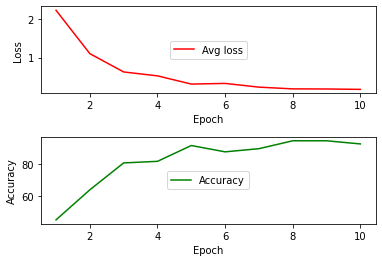

In [ ]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.5)

g1 = fig.add_subplot(2, 1, 1, ylabel="Loss", xlabel="Epoch")
g1.plot(epochs, avg_losses, label="Avg loss", color="red")
g1.legend(loc="center")

g2 = fig.add_subplot(2, 1, 2, ylabel="Accuracy", xlabel="Epoch")
g2.plot(epochs, accuracies, label="Accuracy", color="green")
g2.legend(loc="center")

plt.show()